<a href="https://colab.research.google.com/github/JANANI-B-S/defect-detection/blob/main/Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opencv-python-headless numpy pytest


In [7]:
from google.colab import files
uploaded = files.upload()


Saving wafer_image.png to wafer_image.png


Saving s5.JPG to s5.JPG
Files in directory: ['x1.jpeg', 'x5.jpeg', 'x4.jpeg', 'x2.jpeg', 's2.JPG', 'x3.jpeg', 's9.JPG', 's5.JPG', 's1.jpg', 's4.JPG', 's6.JPG', 's10.JPG', 's7.JPG', 's8.JPG', 't1.jpg', 's3.JPG']
Processed x1.jpeg: 5 contours detected.


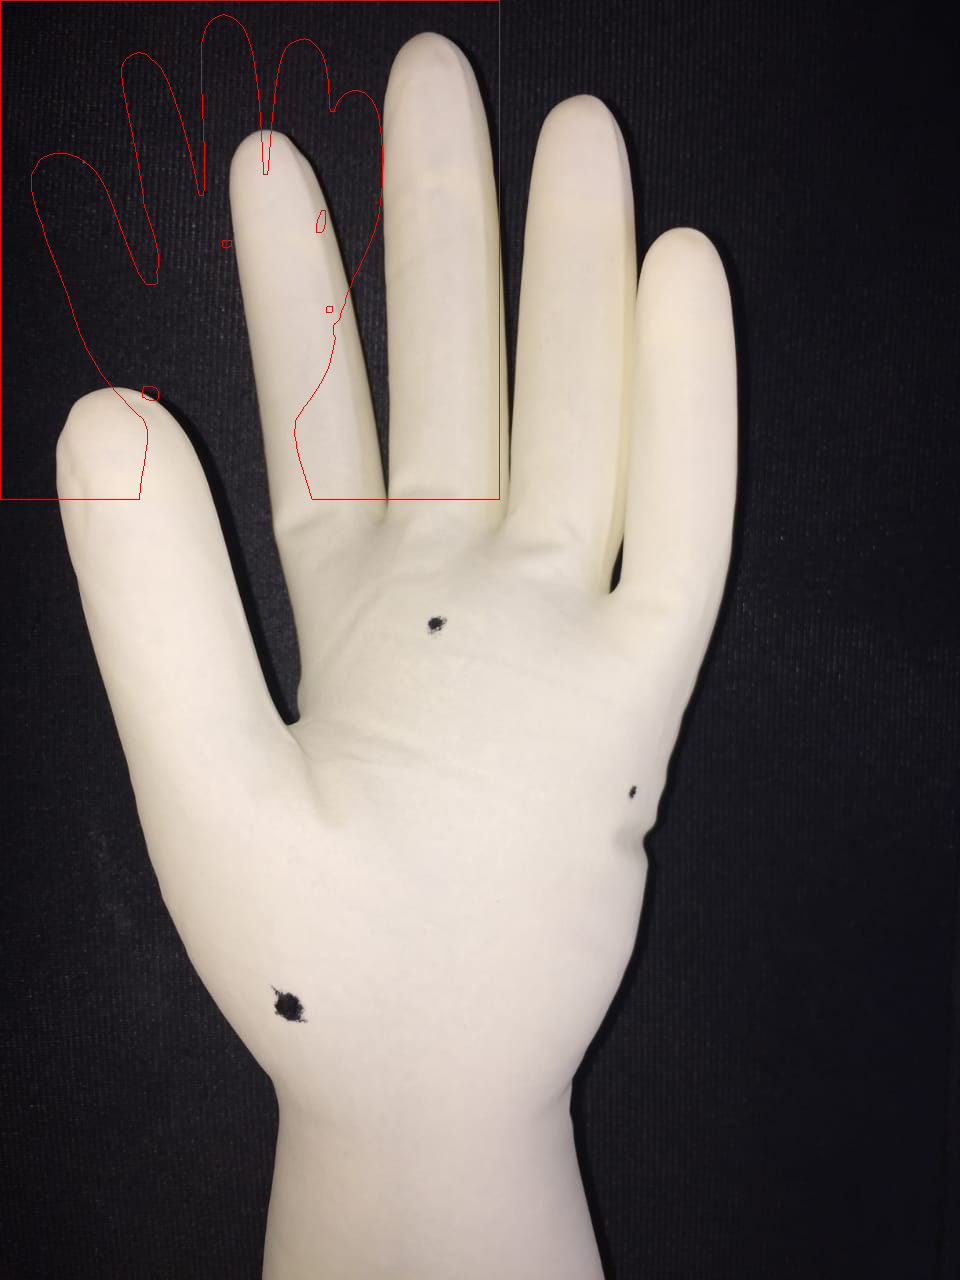

Processed x5.jpeg: 5 contours detected.


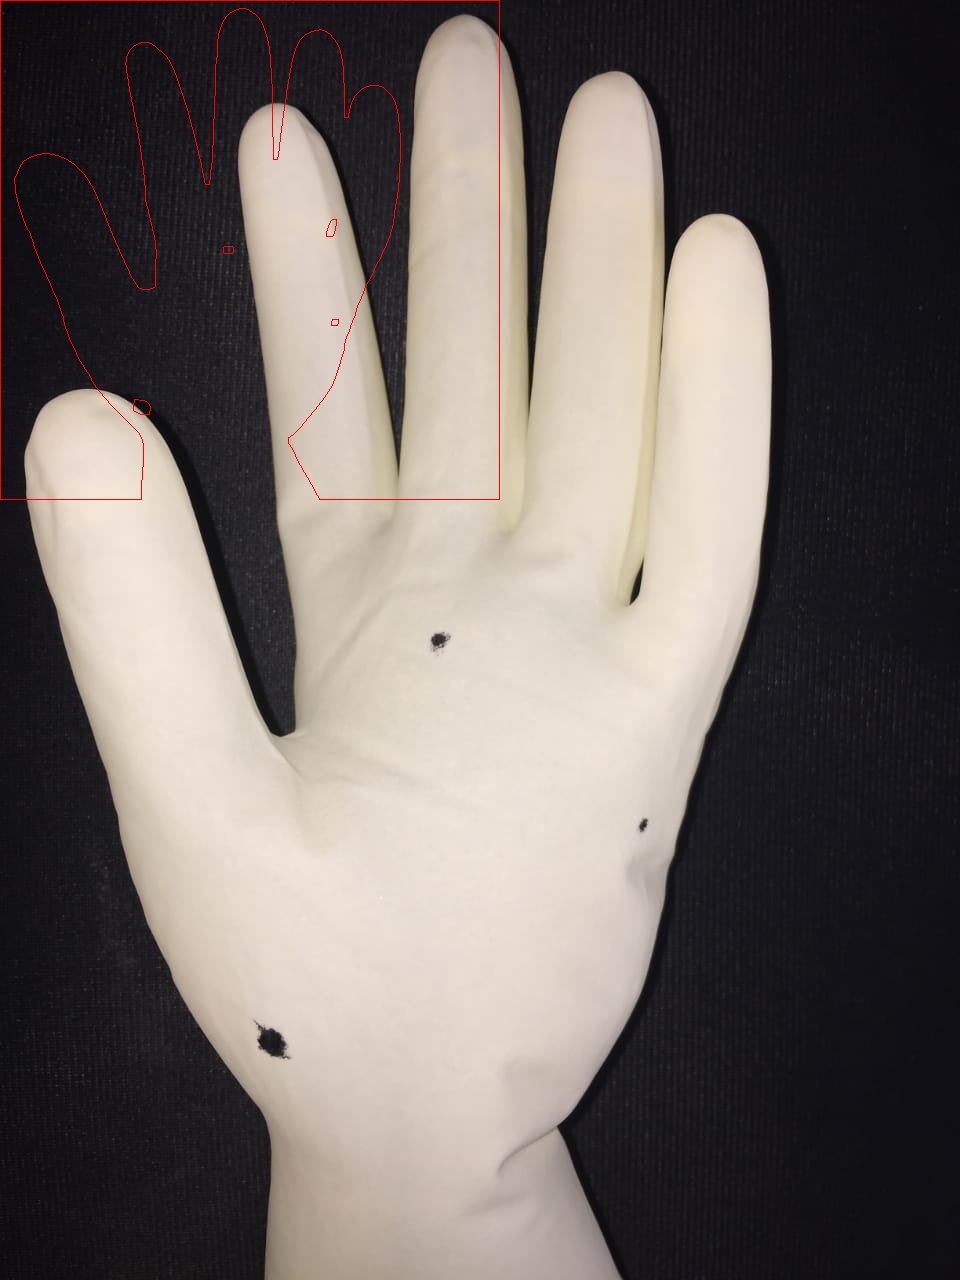

In [ ]:
import os
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images

# Upload images if not already present
uploaded = files.upload()  # Uncomment this line to upload images

# Set the image directory (adjust based on your upload path)
IMAGE_DIRECTORY = '/content/sample_data/images'  # Change this if needed
IMAGE_SIZE = (500, 500)

# Threshold values
THRESHOLD_VALUE = 110
MAX_VALUE = 255
INV_THRESHOLD_VALUE = 50
INV_MAX_VALUE = 255
THRESHOLD1 = 100
THRESHOLD2 = 70

# Contour properties
CON_COLOR = (0, 0, 255)
CON_THICKNESS = 1
WHITE = (255, 255, 255)

def process_image(file):
    PATH = os.path.join(IMAGE_DIRECTORY, file)  # Construct full path
    imageOri = cv2.imread(PATH)

    if imageOri is None:
        print(f"Error loading image: {file}")
        return None, 0  # Return None and 0 contours

    # Convert to grayscale
    image = cv2.cvtColor(imageOri, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, IMAGE_SIZE)
    image = cv2.GaussianBlur(image, (3, 3), 0)

    # Threshold the image
    ret, thresh_basic = cv2.threshold(image, THRESHOLD_VALUE, MAX_VALUE, cv2.THRESH_BINARY)

    # Morphological operations
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(thresh_basic, kernel, iterations=1)

    # Invert the thresholded image
    ret, thresh_inv = cv2.threshold(img_erosion, INV_THRESHOLD_VALUE, INV_MAX_VALUE, cv2.THRESH_BINARY_INV)

    # Find Canny edges and contours
    edged = cv2.Canny(img_erosion, THRESHOLD1, THRESHOLD2)
    contours, _ = cv2.findContours(thresh_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Draw contours on the original image
    if len(contours) > 0:
        for i in range(len(contours)):
            cv2.drawContours(imageOri, contours, i, CON_COLOR, CON_THICKNESS)

    return imageOri, len(contours)

# Process images in the specified directory
files = os.listdir(IMAGE_DIRECTORY)  # List all files in the directory
print("Files in directory:", files)

for file in files:
    highlighted_img, num_of_contours = process_image(file)
    if highlighted_img is not None:
        print(f"Processed {file}: {num_of_contours} contours detected.")
        cv2_imshow(highlighted_img)  # Use cv2_imshow instead of cv2.imshow

# Cleanup
cv2.destroyAllWindows()
